### Загрузка пакетов

In [26]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка датафрейма

In [27]:
churn_df = pd.read_csv('telecom_churn_clean.csv')
print(churn_df)

      Unnamed: 0  account_length  area_code  international_plan  \
0              0             128        415                   0   
1              1             107        415                   0   
2              2             137        415                   0   
3              3              84        408                   1   
4              4              75        415                   1   
...          ...             ...        ...                 ...   
3328        3328             192        415                   0   
3329        3329              68        415                   0   
3330        3330              28        510                   0   
3331        3331             184        510                   1   
3332        3332              74        415                   0   

      voice_mail_plan  number_vmail_messages  total_day_minutes  \
0                   1                     25              265.1   
1                   1                     26              161

In [28]:
print(churn_df.columns)

Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')


### Разделим переменные на целевую и независимые

In [29]:
y = churn_df['churn'].values
X = churn_df[['account_length', 'customer_service_calls']].values

In [30]:
print(y)

[0 0 0 ... 0 0 0]


### Построение модели

In [31]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### Создание набора для тестирования

In [32]:
X_new = np.array([
    [30, 17],
    [107, 50],
    [210, 10]
]
)

### Предсказание

In [33]:
y_pred = knn.predict(X_new)
print(y_pred)

[0 1 0]


### Разбитие данных

In [34]:
from sklearn.model_selection import train_test_split
X = churn_df.drop('churn', axis=1)
y = churn_df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21, stratify=y)

### Обучение и предсказание

In [35]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8622754491017964

### Создание множеств соседей

In [36]:
neighbors = np.arange(1,31)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] 
 {1: 1.0, 2: 0.887295765255085, 3: 0.8999666555518506, 4: 0.8739579859953318, 5: 0.8829609869956653, 6: 0.8699566522174058, 7: 0.8756252084028009, 8: 0.8646215405135045, 9: 0.8666222074024675, 10: 0.8609536512170723, 11: 0.863621207069023, 12: 0.8592864288096032, 13: 0.8612870956985662, 14: 0.8586195398466155, 15: 0.8606202067355785, 16: 0.8579526508836278, 17: 0.8592864288096032, 18: 0.8582860953651217, 19: 0.8589529843281094, 20: 0.8582860953651217, 21: 0.8589529843281094, 22: 0.8562854284761587, 23: 0.8579526508836278, 24: 0.8569523174391463, 25: 0.8572857619206402, 26: 0.8562854284761587, 27: 0.8569523174391463, 28: 0.8559519839946649, 29: 0.8559519839946649, 30: 0.855618539513171} 
 {1: 0.8083832335329342, 2: 0.8562874251497006, 3: 0.8323353293413174, 4: 0.8592814371257484, 5: 0.8413173652694611, 6: 0.8622754491017964, 7: 0.8622754491017964, 8: 0.8592814371257484, 9: 0.8652694610778443, 1

### Оценка модели от количества соседей

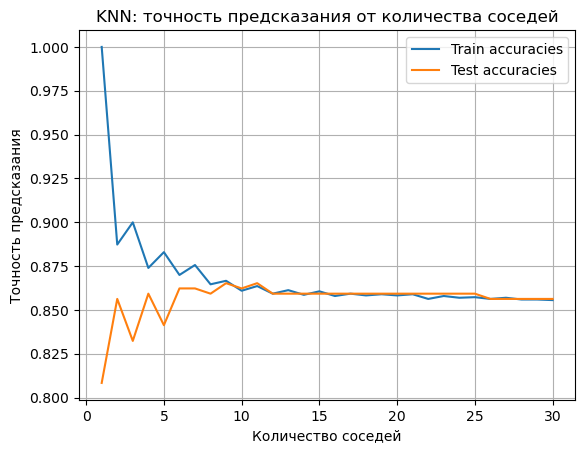

In [37]:
plt.title('KNN: точность предсказания от количества соседей')
plt.plot(neighbors, train_accuracies.values(), label = 'Train accuracies')
plt.plot(neighbors, test_accuracies.values(), label = 'Test accuracies')
plt.legend()
plt.grid()
plt.xlabel('Количество соседей')
plt.ylabel('Точность предсказания')
plt.show()